In [0]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir('/content/drive/My Drive/514model/514proj3')

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
def read_txt_file(file_path):
    x_all=[]
    with open(file_path,'r') as f:
        for l in f.readlines():
            line=list(map(int,l.split()))
            x_all.append(line)
    return x_all

x_all = read_txt_file('prostate_cancer_train_data/total_x_8.txt')
y_all = read_txt_file('prostate_cancer_train_data/total_y_8.txt')

In [0]:
xd = pd.DataFrame(np.asarray(x_all))
yd = pd.DataFrame(np.asarray(y_all))
data = pd.concat([xd,yd], axis=1)
data.columns = range(0,1201)

In [0]:
b0 = data[data.iloc[:,-1]==0]
b5 = data[data.iloc[:,-1]==1]
b3 = data[data.iloc[:,-1]==2]
bi = data[data.iloc[:,-1]==3]

In [0]:
b = b3
p = b.iloc[:,480:510]
p.shape#.head(5)

In [0]:
p.groupby([p[480+14],p[480+15]]).count()

In [0]:
f = p.loc[(p[685+14]==3)&(p[685+15]==3)&(p[685+16]==4)&(p[685+17]==1)&(p[685+18]==1)&(p[685+19]==3)&(p[685+20]==1)]
f.shape

In [0]:
ct = pd.DataFrame(np.zeros([16,p.shape[1]-1]))
ct.head(5)

In [0]:
for j in range(0,p.shape[1]-1):
  for i in range(0,p.shape[0]):
    if(p.iloc[i,j]==1 and p.iloc[i,j+1]==1):
      ct.iloc[0,j]= ct.iloc[0,j]+1
    elif(p.iloc[i,j]==1 and p.iloc[i,j+1]==2):
      ct.iloc[1,j]= ct.iloc[1,j]+1
    elif(p.iloc[i,j]==1 and p.iloc[i,j+1]==3):
      ct.iloc[2,j]= ct.iloc[2,j]+1
    elif(p.iloc[i,j]==1 and p.iloc[i,j+1]==4):
      ct.iloc[3,j]= ct.iloc[3,j]+1
    elif(p.iloc[i,j]==2 and p.iloc[i,j+1]==1):
      ct.iloc[4,j]= ct.iloc[4,j]+1
    elif(p.iloc[i,j]==2 and p.iloc[i,j+1]==2):
      ct.iloc[5,j]= ct.iloc[5,j]+1
    elif(p.iloc[i,j]==2 and p.iloc[i,j+1]==3):
      ct.iloc[6,j]= ct.iloc[6,j]+1
    elif(p.iloc[i,j]==2 and p.iloc[i,j+1]==4):
      ct.iloc[7,j]= ct.iloc[7,j]+1
    elif(p.iloc[i,j]==3 and p.iloc[i,j+1]==1):
      ct.iloc[8,j]= ct.iloc[8,j]+1
    elif(p.iloc[i,j]==3 and p.iloc[i,j+1]==2):
      ct.iloc[9,j]= ct.iloc[9,j]+1
    elif(p.iloc[i,j]==3 and p.iloc[i,j+1]==3):
      ct.iloc[10,j]= ct.iloc[10,j]+1
    elif(p.iloc[i,j]==3 and p.iloc[i,j+1]==4):
      ct.iloc[11,j]= ct.iloc[11,j]+1
    elif(p.iloc[i,j]==4 and p.iloc[i,j+1]==1):
      ct.iloc[12,j]= ct.iloc[12,j]+1
    elif(p.iloc[i,j]==4 and p.iloc[i,j+1]==2):
      ct.iloc[13,j]= ct.iloc[13,j]+1
    elif(p.iloc[i,j]==4 and p.iloc[i,j+1]==3):
      ct.iloc[14,j]= ct.iloc[14,j]+1
    elif(p.iloc[i,j]==4 and p.iloc[i,j+1]==4):
      ct.iloc[15,j]= ct.iloc[15,j]+1

In [0]:
f = p.loc[(p[685+14] == 3)&(p[685+15] == 3)&(p[685+16] == 4)&(p[685+17] == 1)&(p[685+18] == 1)&(p[685+19] == 3)]
f.groupby(f[685+20]).count()

In [0]:
print(ct.max().max())
a = ct[ct==4]
a

---------------------------------------------------------------

In [0]:
def count2(a1,a2):
  count = 0
  for i in range(0,p.shape[0]):
    for j in range(0,p.shape[1]-1):
      if(p.iloc[i,j]==a1 and p.iloc[i,j+1]==a2):
        count = count+1
  return count

In [0]:
count = np.zeros(16);
for i in range(1,5):
  for j in range(1,5):
    count[(i-1)*4+j-1] = count2(i,j)


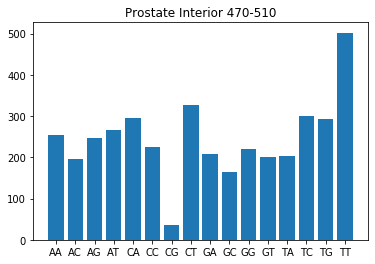

In [0]:
plt.bar(range(1,17), count)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16],
           ['AA','AC','AG','AT','CA','CC','CG','CT','GA','GC','GG','GT','TA','TC','TG','TT'])
plt.title('Prostate Interior 470-510')
plt.savefig('pro_bi_470_510_count.png',dpi=600)

In [0]:
# circle
# linear

#bi 480-510 (18-19)
# AG 34 CAG 21 CAGA 14  /101 
# AG 4  CAG 1  CAGA 1   /10

#b0 480-510 (18-19)
# AG 1169 CAG 666 CAGA 303  /3370
# AG 23   CAG 11  CAGA 3    /54

#b5 480-510 (18-19)
# AG 125 CAG 80 CAGA 29  /274
# AG 2   CAG 0           /8     AG CC GG 2

#b3 480-510 (14-15)
# TT 56 TTT 28 TTTC 14 TTTCA 10  /141
# TT 2  TTT 2  TTTC 0            /3

#bi 685-715 (15-16)
# GT 34 GTA 23/GGT 23 GGTA 23 AGGTA 11 AGGTAA 7  /101 
# GT 1  GTA 0                                    /10      GC 4

#b0 685-715 (15-16)
# GT 1169 GTA 830 GTAA 599 GTAAG 501 GTAAGT 310  /3370
# GT 23   GTA 16  GTAA 14  GTAAG 9   GTAAGT 5    /54      

#b5 685-715 (15-16)
# GT 120 GTA 78 GTAA 47 GTAAG 38 GTAAGT 22 AGTAAGT 12 AAGTAAGTT 6  /274
# GT 2   GTA 1  GTAA 1  GTAAG 1  GTAAGT 0                          /8      AG 3

#b3 685-715 (15-16)
# GT 56 GTA 45 GTAA 31 GTAAG 30 GGTAAG 15 GGTAAGA 8  /141
# GT 2  GTA 1  GTAA 1  GTAAG 1  GGTAAG 1  GGTAAGA 0  /3